In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
import folium
from folium.plugins import FastMarkerCluster
import re


In [3]:
df = pd.read_csv("../data/listings.csv.gz",compression="gzip")

In [4]:
df.shape

(8739, 75)

## 1) Splitting the dataset into 70-15-15 ratio

In [5]:
df_full_train,df_test = train_test_split(df,test_size=0.15,random_state=810)
df_train,df_df_val = train_test_split(df_full_train,test_size=0.15,random_state=810)

In [6]:
print("Dataset shape when train and validation is combined",df_full_train.shape)
print("Dataset shape of the test dataset",df_test.shape)

Dataset shape when train and validation is combined (7428, 75)
Dataset shape of the test dataset (1311, 75)


## 2) Data Preprocessing

In [7]:
df_full_train.head().T

,5106,5961,7311,1213,2387
id,1020339493261692070,991906029869083109,800065755352436194,1012266793074500896,29923896
listing_url,https://www.airbnb.com/rooms/1020339493261692070,https://www.airbnb.com/rooms/991906029869083109,https://www.airbnb.com/rooms/800065755352436194,https://www.airbnb.com/rooms/1012266793074500896,https://www.airbnb.com/rooms/29923896
scrape_id,20231212015436,20231212015436,20231212015436,20231212015436,20231212015436
last_scraped,2023-12-12,2023-12-12,2023-12-12,2023-12-12,2023-12-12
source,city scrape,previous scrape,city scrape,city scrape,city scrape
...,...,...,...,...,...
calculated_host_listings_count,2,1,1,1,3
calculated_host_listings_count_entire_homes,2,1,1,1,0
calculated_host_listings_count_private_rooms,0,0,0,0,3
calculated_host_listings_count_shared_rooms,0,0,0,0,0


In [8]:
df_full_train.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
cat_features = list((df_full_train.dtypes[df_full_train.dtypes=="object"]).index)
print(len(cat_features))
print(cat_features)

34
['listing_url', 'last_scraped', 'source', 'name', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable']


In [10]:
df_full_train.columns = df_full_train.columns.str.replace(" ","_").str.lower()
for col in cat_features:
    df_full_train[col] = df_full_train[col].str.replace(" ","_").str.lower()

In [11]:
all_features = list(df_full_train.columns)
print(len(all_features))

75


In [12]:
for col in all_features:
    print(col)
    print(df_full_train[col].nunique())
    print(df_full_train[col].unique()[:5])
    print("----------------------------------------------------------------------------------")

id
7428
[1020339493261692070  991906029869083109  800065755352436194
 1012266793074500896            29923896]
----------------------------------------------------------------------------------
listing_url
7428
['https://www.airbnb.com/rooms/1020339493261692070'
 'https://www.airbnb.com/rooms/991906029869083109'
 'https://www.airbnb.com/rooms/800065755352436194'
 'https://www.airbnb.com/rooms/1012266793074500896'
 'https://www.airbnb.com/rooms/29923896']
----------------------------------------------------------------------------------
scrape_id
1
[20231212015436]
----------------------------------------------------------------------------------
last_scraped
2
['2023-12-12' '2023-12-13']
----------------------------------------------------------------------------------
source
2
['city_scrape' 'previous_scrape']
----------------------------------------------------------------------------------
name
3256
['rental_unit_in_amsterdam_·_★new_·_1_bedroom_·_1_bed_·_1_bath'
 'rental_unit_in_ams

In [13]:
#Few columns have information regarding scrap so they are irrelevant to the problem statement.
#columns related to scrap are :  scrape_id, last_scraped, source, calendar_last_scraped

In [14]:
#Rows having alot of unique value and does not contain much information regarding the pricing of the house are irrelevant as well.
#Columns are : id, listing_url, name, description, picture_url, host_id, host_url, host_name, host_location, host_thumbnail_url, host_picture_url, host_verifications, host_has_profile_pic, host_identity_verified,neighbourhood_group_cleansed, amenities
                #bathrooms,minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated
                #has_availability, availability_30, availability_60, availability_90, availability_365, first_review, last_review, license, calculated_host_listings_count, calculated_host_listings_count_entire_homes,
                #calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms

In [15]:
#Columns that might be interesting but not sure to be used or not
#Columns : neighborhood_overview, host_about, host_response_rate, host_neighbourhood, host_listings_count, host_total_listings_count, property_type, maximum_nights, number_of_reviews_ltm, number_of_reviews_l30d,
            #review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, beds,  minimum_nights,

In [16]:
#Columns to be used to model the problem statement
#columns: host_since, host_acceptance_rate, host_is_superhost,neighbourhood_cleansed, latitude, longitude, room_type, accommodates, bathrooms_text, price, number_of_reviews, review_scores_rating, reviews_per_month  

In [17]:
df_full_train["neighbourhood_cleansed"].value_counts()

neighbourhood_cleansed
de_baarsjes_-_oud-west                    1273
centrum-west                               862
de_pijp_-_rivierenbuurt                    844
centrum-oost                               683
zuid                                       519
westerpark                                 509
oud-oost                                   454
bos_en_lommer                              374
oud-noord                                  349
oostelijk_havengebied_-_indische_buurt     290
watergraafsmeer                            214
noord-west                                 196
ijburg_-_zeeburgereiland                   164
slotervaart                                161
noord-oost                                 122
geuzenveld_-_slotermeer                    101
buitenveldert_-_zuidas                      91
de_aker_-_nieuw_sloten                      62
gaasperdam_-_driemond                       49
osdorp                                      44
bijlmer-centrum                      

## 3)EDA 

#### 3.1) Neighbourhoods

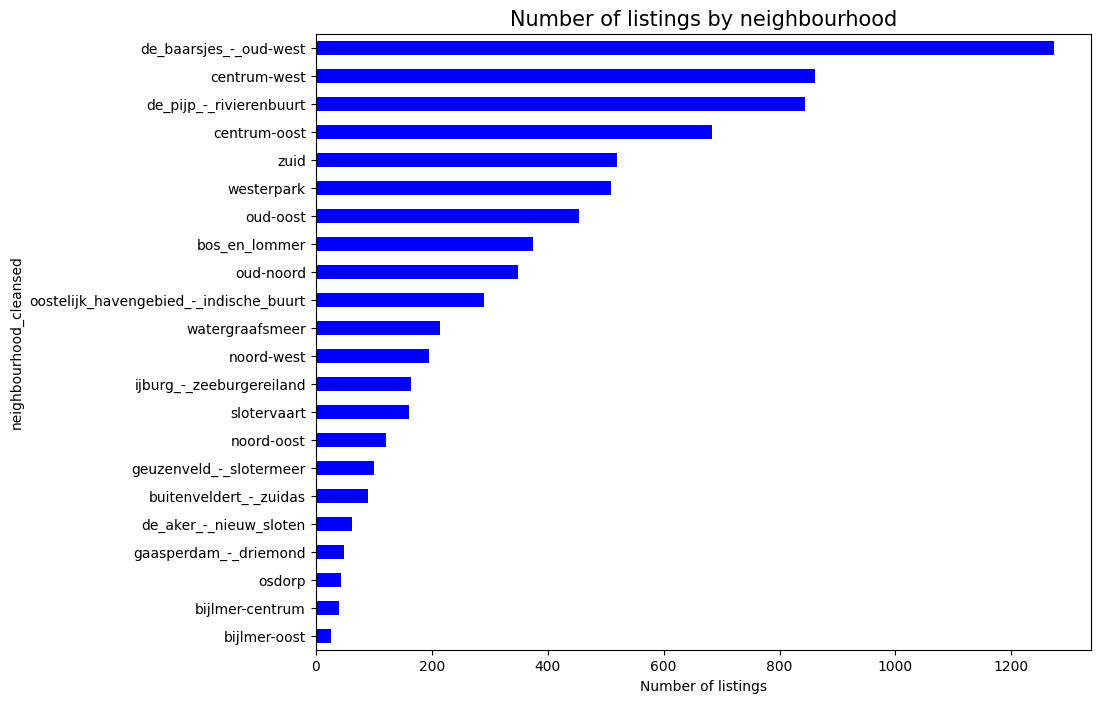

In [18]:
nei_frequency = df_full_train["neighbourhood_cleansed"].value_counts().sort_values(ascending=True)
nei_frequency.plot.barh(figsize=(10,8),color = "b", width=0.5)
plt.title("Number of listings by neighbourhood", fontsize=15)
plt.xlabel("Number of listings",fontsize=10)
plt.show()

In [19]:
lats = df_full_train["latitude"].tolist()
lons = df_full_train["longitude"].tolist()
locations = list(zip(lats,lons))
map1 = folium.Map(locations=[52.38, 4.9],zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [20]:
#most of the places are location near to the city centre

#### 2.2) Room and property types

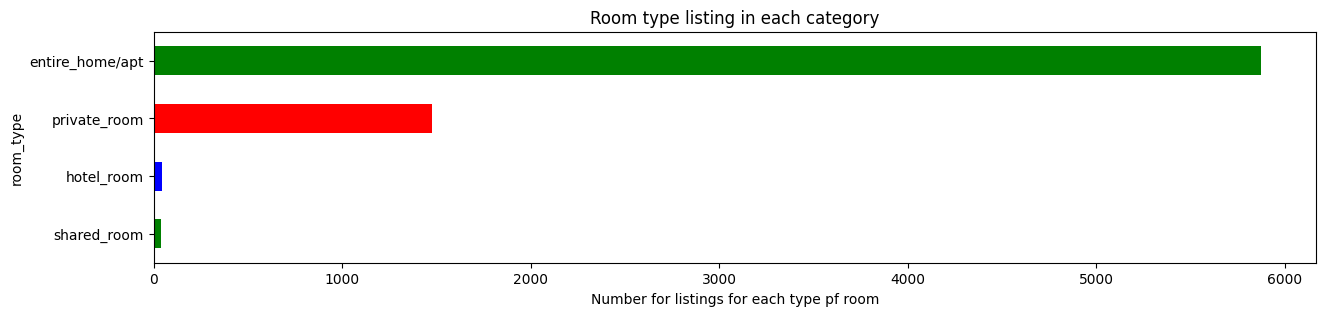

In [21]:
room_fre = df_full_train["room_type"].value_counts().sort_values(ascending=True)
room_fre.plot.barh(figsize=(15,3),width=0.5,color=["g","b","r"])
plt.xlabel("Number for listings for each type pf room")
plt.title("Room type listing in each category")
plt.show()

In [22]:
#Entire home/apt has the most listing while shared room and hotel room has hardly booked through airbnb so it has less listings

In [23]:
df_full_train.bathrooms_text.value_counts()

bathrooms_text
1_bath               3531
1.5_baths            2053
1_private_bath        630
2_baths               426
1_shared_bath         273
2.5_baths             159
1.5_shared_baths      147
3_baths                82
3.5_baths              45
0_shared_baths         16
0_baths                16
half-bath              10
4_baths                 5
5_baths                 5
private_half-bath       4
5.5_baths               4
4.5_baths               4
2.5_shared_baths        3
2_shared_baths          2
3_shared_baths          2
shared_half-bath        2
7_baths                 1
17_baths                1
4_shared_baths          1
Name: count, dtype: int64

In [24]:
df_full_train.groupby("room_type").bathrooms_text.value_counts()

room_type        bathrooms_text   
entire_home/apt  1_bath               3356
                 1.5_baths            1817
                 2_baths               388
                 2.5_baths             153
                 3_baths                78
                 3.5_baths              45
                 0_baths                 9
                 half-bath               8
                 4_baths                 5
                 4.5_baths               4
                 5.5_baths               4
                 5_baths                 4
                 17_baths                1
                 7_baths                 1
hotel_room       1_private_bath         24
                 1_bath                  9
                 1_shared_bath           2
                 0_shared_baths          1
                 1.5_shared_baths        1
                 half-bath               1
private_room     1_private_bath        606
                 1_shared_bath         247
                 1.

In [25]:
#create new columns if the bathroom is shared or not and converting bathrooms_text into a float columns

In [26]:
df_full_train.groupby("beds").bathrooms_text.value_counts()

beds  bathrooms_text  
1.0   1_bath              2243
      1.5_baths            962
      1_private_bath       418
      1_shared_bath        203
      1.5_shared_baths     110
                          ... 
22.0  2.5_baths              1
24.0  5.5_baths              3
26.0  2.5_baths              1
30.0  17_baths               1
33.0  3_baths                1
Name: count, Length: 102, dtype: int64

In [27]:
c = df_full_train[df_full_train.bathrooms_text.isna()]["beds"]
c

312     1.0
8173    1.0
3845    1.0
2811    1.0
8319    3.0
5611    4.0
Name: beds, dtype: float64

In [28]:
#since the beds are lower values only for which bathrooms_text is missing so bed column value is filled in the bathroom columns 
df_full_train["bathrooms_text"].fillna(df_full_train["beds"], inplace=True)

C:\Users\amitb\AppData\Local\Temp\ipykernel_9824\1562351552.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_full_train["bathrooms_text"].fillna(df_full_train["beds"], inplace=True)


In [47]:
def bathroom_number(text):
    text = str(text)
    if "half" in text:
        return 0.5
    else:
        number = re.findall(r'\d+\.\d+|\d+', text)
    return float(number[0])
df_full_train["bathrooms"] = df_full_train["bathrooms_text"].apply(bathroom_number)

In [50]:
df_full_train["private"] = df_full_train["bathrooms_text"].apply(lambda x:0 if "shared" in str(x) else 1)

<Axes: ylabel='private'>

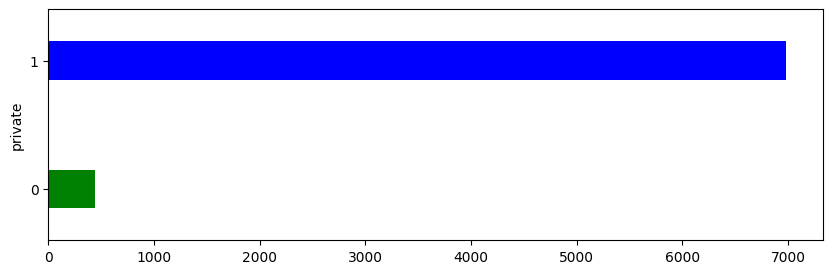

In [105]:
df_full_train.private.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,3),width=0.3,color=["g","b"])


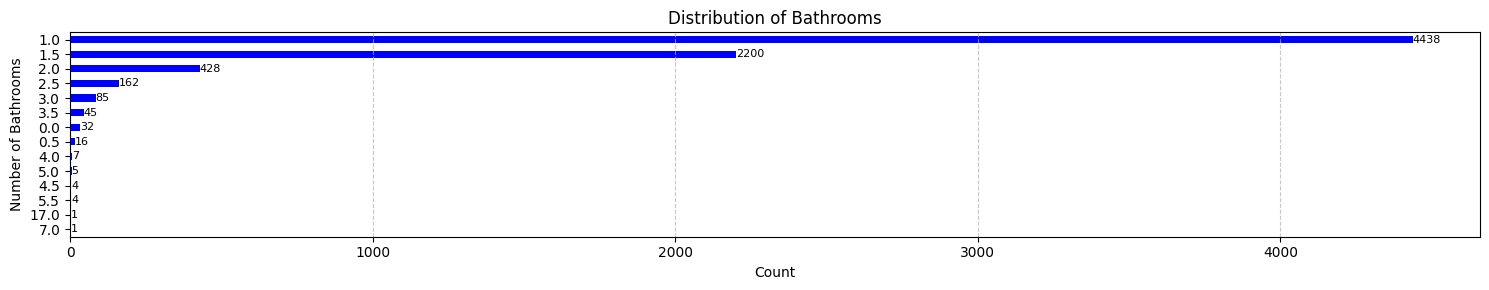

In [86]:
bathroom_counts = df_full_train["bathrooms"].value_counts().sort_values(ascending=True)
# Plot the horizontal bar chart
plt.figure(figsize=(15, 3))
bars = bathroom_counts.plot.barh(width=0.5, color='b')
plt.xlabel('Count')
plt.ylabel('Number of Bathrooms')
plt.title('Distribution of Bathrooms')

# Annotate each bar with its value
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=8, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add vertical grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

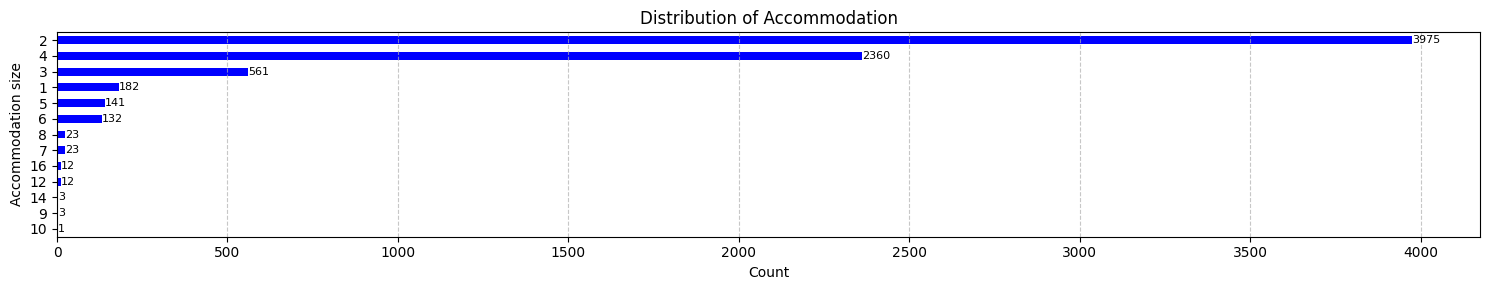

In [91]:
accommodation_counts = df_full_train["accommodates"].value_counts().sort_values(ascending=True)
# Plot the horizontal bar chart
plt.figure(figsize=(15, 3))
bars = accommodation_counts.plot.barh(width=0.5, color='b')
plt.xlabel('Count')
plt.ylabel('Accommodation size')
plt.title('Distribution of Accommodation')

# Annotate each bar with its value
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=8, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add vertical grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

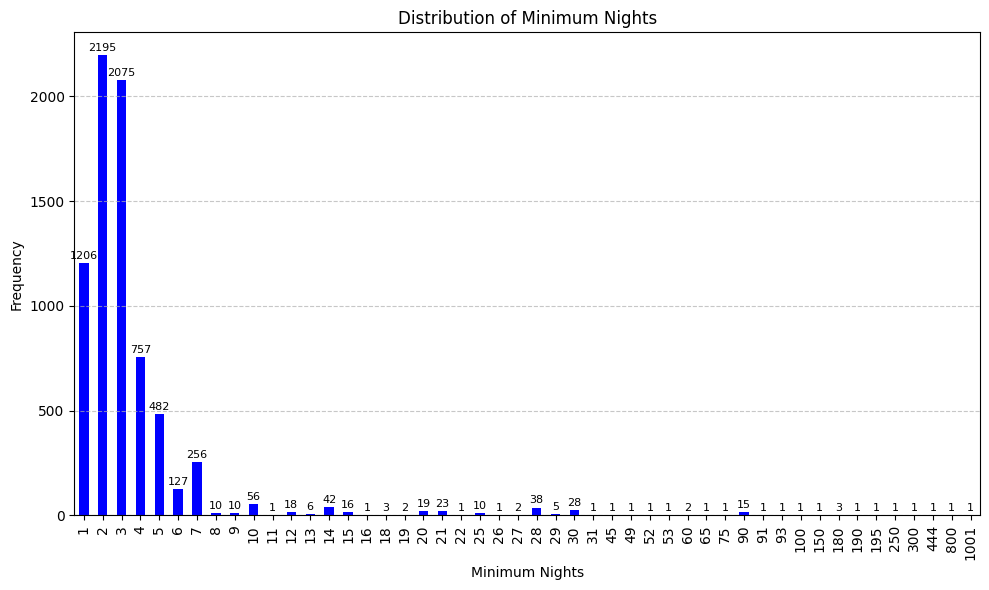

In [101]:
plt.figure(figsize=(10, 6))
ax = df_full_train["minimum_nights"].value_counts().sort_index().plot(kind='bar', color='b')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum Nights')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Annotate each bar with its count value
for i in ax.patches:
    plt.text(i.get_x() + i.get_width()/2, i.get_height() + 10, str(int(i.get_height())), 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
